For  1000 steps the min is 0.0 , the max is 27.0 , the average is 10.01 , and the standard deviation is 5.223973583394159 .
For  8000 steps the min is 38.0 , the max is 119.0 , the average is 80.01 , and the standard deviation is 16.680224818628794 .


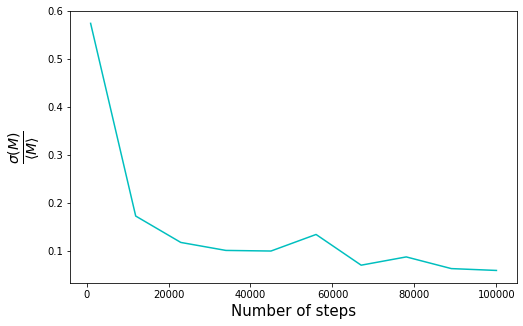

In [13]:
xelatex
#Problem 1 Random Walk
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, randint

N = 10 #lattice size

def particle_jump(position, N):
    # define ordered pair for x,y position
    x = position[0]
    y = position[1]
    
    #4 possible directions for jump, restricted by edges
    r = randint(4)
    if r == 0: #up movement
        if y != N:
            y += 1
    elif r == 1: #down movement
        if y!= 1: 
            y -= 1
    elif r == 2: #right movement
        if x != N:
            x += 1
    else:        #left movement
        if x != 1:
            x -= 1
    return np.array([x,y])

def drunk_walk(N, steps): #chooses random starting position and generates a random walk for a given number of steps
    M = np.zeros((N,N))   
    x = randint(1,N+1)
    y = randint(1,N+1)
    
    M[x-1,y-1] = 1          # counts the number of occurences at a given x,y position
    for i in range(steps):
        x,y = particle_jump([x,y],N)
        M[x-1,y-1] += 1
    return (np.std(M), np.average(M), np.min(M), np.max(M))

# Returns 1000 and 8000 step min, max, average, and std

data_points = 2
two_step_mat = np.array([1000,8000])
C = np.zeros((4,data_points))

for j in range(2):
    C[:,j] = drunk_walk(N,two_step_mat[j])
    print("For ", two_step_mat[j], "steps the min is", C[2,j], ", the max is", C[3,j], ", the average is", C[1,j], 
          ", and the standard deviation is", C[0,j],".")

#D stores the average and standard deviation for step_num different step numbers from 1000 to 100000

step_num = 10
step_array = np.linspace(1000,100000, step_num, dtype = int)
D = np.zeros((4,step_num))

for k in range(step_num):
    D[:,k] = drunk_walk(N,step_array[k])

#plotting routine
plt.figure(figsize=(8, 5))
plt.plot(step_array,D[0,:]/D[1,:], color = 'c')
plt.xlabel('Number of steps', fontsize = 15)
plt.ylabel(r"$\frac{\sigma(M)}{\langle M \rangle}$", fontsize = 20)
plt.show()